**Adapted by [Scipy Lecture Notes:](http://www.scipy-lectures.org/index.html) Tutorials on the scientific Python ecosystem: a quick introduction to central tools and techniques. The different chapters each correspond to a 1 to 2 hours course with increasing level of expertise, from beginner to expert. This jupyter notebook is devoted to the Section [1.3.2. Numerical operations on arrays](http://www.scipy-lectures.org/intro/numpy/operations.html) of Numpy chapter.**

# [Numerical Operations on Arrays](http://www.scipy-lectures.org/intro/numpy/operations.html)

In [1]:
import numpy as np

## 1.3.2.1. Elementwise operations

**Basic operations**

**With scalars:**

In [2]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [3]:
2**a

array([ 2,  4,  8, 16])

**All arithmetic operates elementwise:**

In [4]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [5]:
a * b

array([2., 4., 6., 8.])

In [6]:
j = np.arange(5)
j

array([0, 1, 2, 3, 4])

In [7]:
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

**These operations are of course much faster than if you did them in pure python:**

In [8]:
a = np.arange(10000)
%timeit a + 1  

2.95 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
l = range(10000)
%timeit [i+1 for i in l] 

521 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Array multiplication is not matrix multiplication:**

In [10]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Note Matrix multiplication:**

In [11]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

**Other operations**

In [12]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [13]:
a > b

array([False, False,  True, False])

**Logical operations:**

In [14]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [15]:
np.logical_and(a, b)

array([ True, False, False, False])

**Transcendental functions:**

In [16]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [17]:
np.log(a)

/Users/hhaji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [18]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

**Shape mismatches**

In [19]:
a = np.arange(4)
# a + np.array([1, 2])  

**Broadcasting? We’ll return to that later.**

**Transposition:**

In [20]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [21]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

**The transposition is a view: As a results, the following code is wrong and will not make a matrix symmetric.**

**It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.**

In [22]:
a += a.T
a

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

**Note: Linear algebra** 

**The sub-module numpy.linalg implements basic linear algebra, such as solving linear systems, singular value decomposition, etc. However, it is not guaranteed to be compiled using efficient routines, and thus we recommend the use of scipy.linalg, as detailed in section Linear algebra operations: scipy.linalg**

## 1.3.2.2. Basic reductions

**Computing sums**

In [23]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [24]:
x.sum()

10

**Sum by rows and by columns:**

In [25]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [26]:
x.sum(axis=0)   # columns (first dimension)

array([4, 6])

In [27]:
x[:, 0].sum(), x[:, 1].sum()

(4, 6)

In [28]:
x.sum(axis=1)   # rows (second dimension)

array([3, 7])

In [29]:
x[0, :].sum(), x[1, :].sum()

(3, 7)

**Same idea in higher dimensions**

In [30]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]     

1.3114860639382537

In [31]:
x[0, 1, :].sum()     

1.3114860639382537

**Other reductions**

**— works the same way (and take axis=)**

In [32]:
x = np.array([[1, 3, 2],[4,5,6]])
x.min()

1

In [33]:
x.max()

6

In [34]:
x.argmin()  # index of minimum

0

In [35]:
x.argmax()  # index of maximum

5

**Logical Operations:**

In [36]:
np.all([True, True, False])

False

In [37]:
np.any([True, True, False])

True

**Note: Can be used for array comparisons:**

In [38]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [39]:
np.all(a == a)

True

In [40]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

**Statistics:**

In [41]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [42]:
np.median(x)

1.5

In [43]:
np.median(y, axis=-1) # last axis

array([2., 5.])

In [44]:
x.std()          # full population standard dev.

0.82915619758885

## Worked Example: data statistics


**Data in populations.txt describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years.**

**You can view the data in an editor, or alternatively in IPython (both shell and notebook):**

In [45]:
!cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


**First, load the data into a NumPy array:**

In [46]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

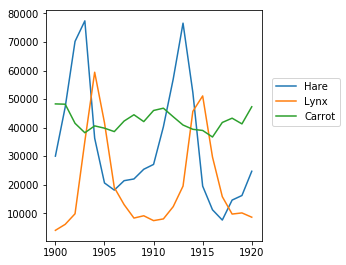

In [47]:
# Then plot it:
%matplotlib inline
from matplotlib import pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 
# plt.show()

In [48]:
# The mean populations over time:
populations = data[:, 1:]
populations

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.],
       [20600., 41700., 39800.],
       [18100., 19000., 38600.],
       [21400., 13000., 42300.],
       [22000.,  8300., 44500.],
       [25400.,  9100., 42100.],
       [27100.,  7400., 46000.],
       [40300.,  8000., 46800.],
       [57000., 12300., 43800.],
       [76600., 19500., 40900.],
       [52300., 45700., 39400.],
       [19500., 51100., 39000.],
       [11200., 29700., 36700.],
       [ 7600., 15800., 41800.],
       [14600.,  9700., 43300.],
       [16200., 10100., 41300.],
       [24700.,  8600., 47300.]])

In [49]:
populations.mean(axis=0)  # The mean of Columns!

array([34080.95238095, 20166.66666667, 42400.        ])

In [50]:
# The sample standard deviations:
populations.std(axis=0)

array([20897.90645809, 16254.59153691,  3322.50622558])

In [51]:
# Which species has the highest population each year?:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

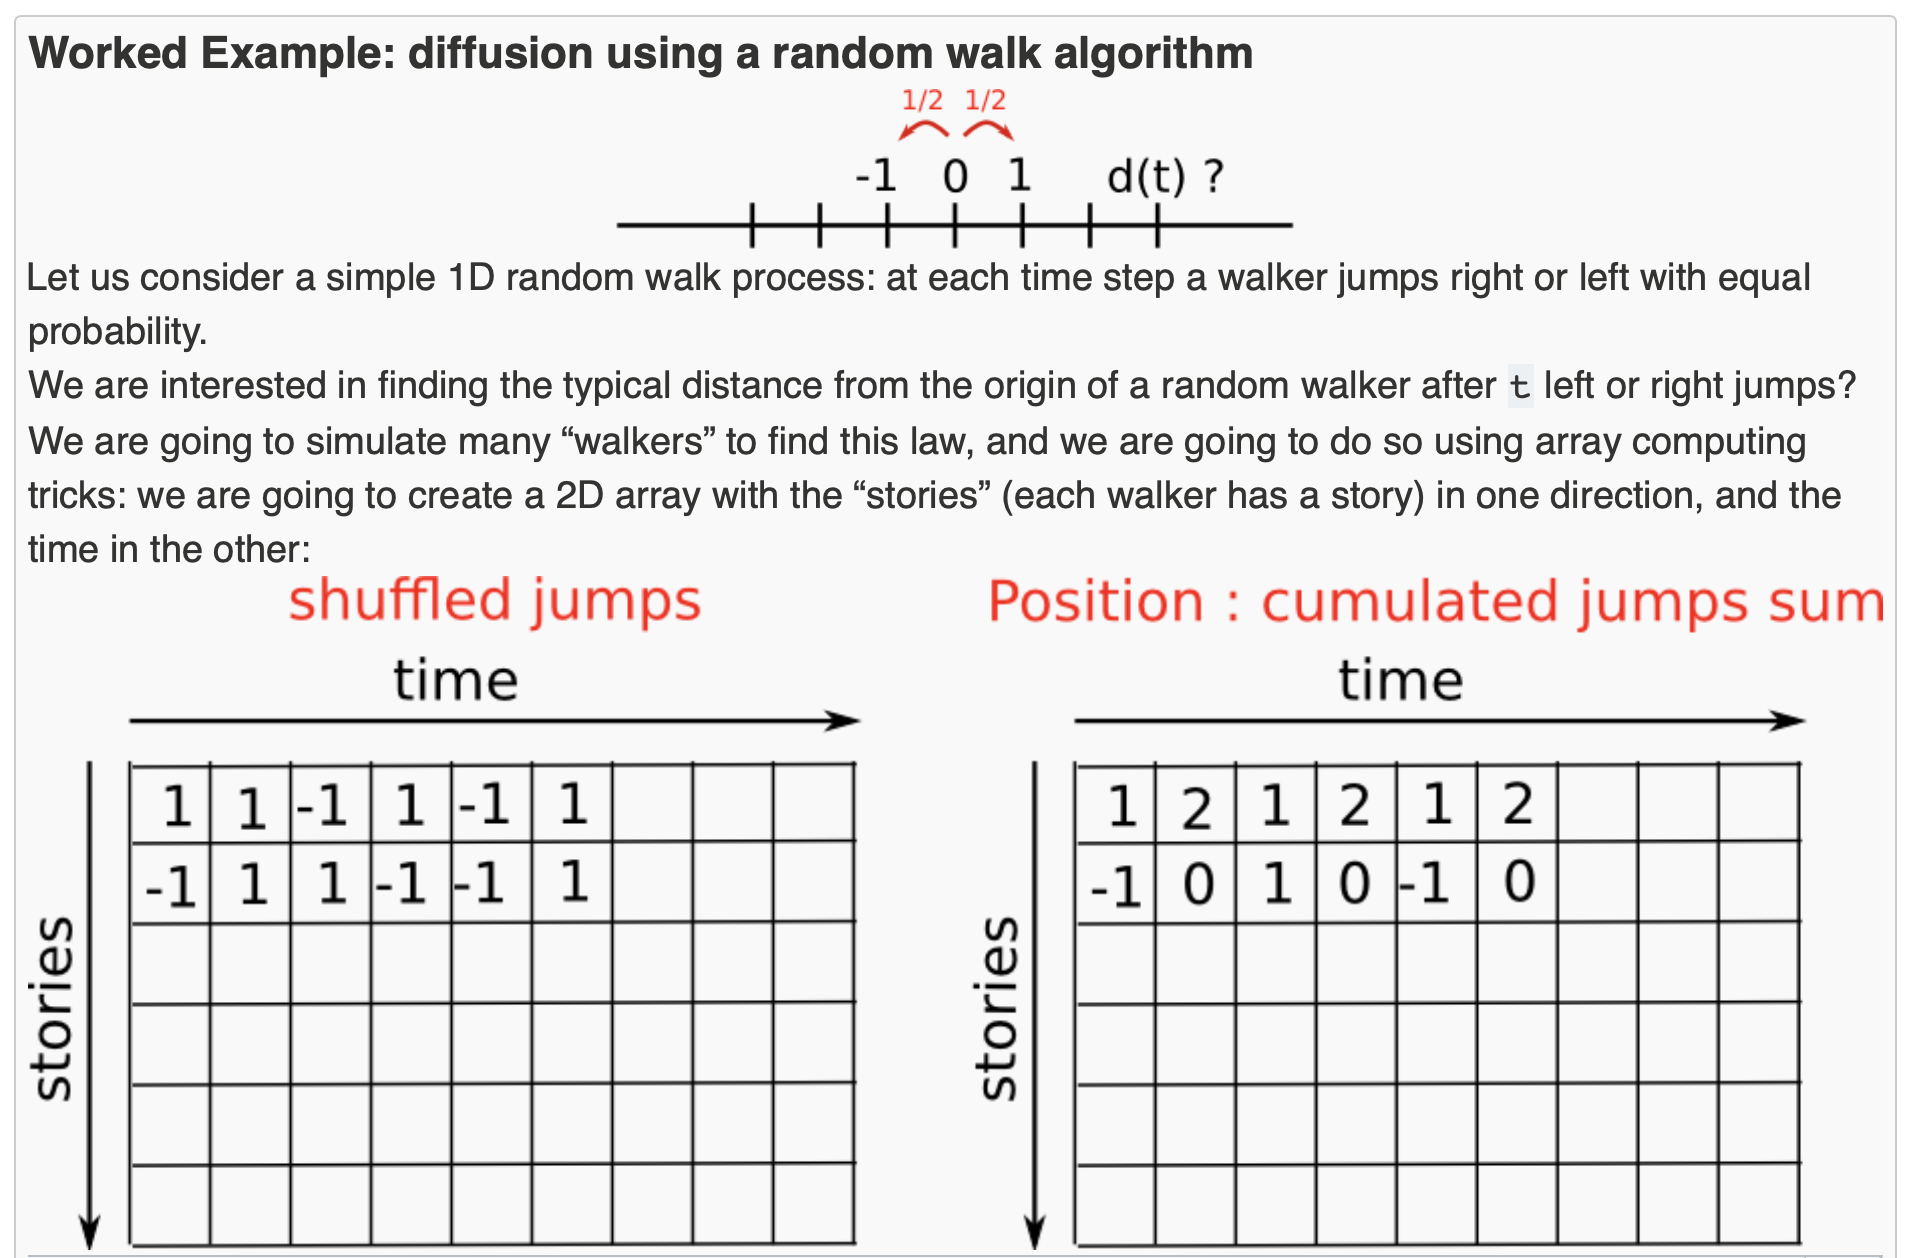

In [52]:
from IPython.display import Image
Image(filename='Images/Walk.png')

In [53]:
n_stories = 1000 # number of walkers
t_max = 200      # time during which we follow the walker

In [54]:
# We randomly choose all the steps 1 or -1 of the walk:
t = np.arange(t_max)

In [55]:
# In the following we use 2 because the high value is exclusive
steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) - 1 
steps

array([[ 1,  1, -1, ...,  1, -1,  1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1, -1, -1],
       ...,
       [ 1, -1,  1, ...,  1, -1,  1],
       [-1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ..., -1,  1,  1]])

In [56]:
np.unique(steps) # Verification: all steps are 1 or -1

array([-1,  1])

In [57]:
# We build the walks by summing steps along the time:
positions = np.cumsum(steps, axis=1) # axis = 1: dimension of time
positions

array([[ 1,  2,  1, ...,  6,  5,  6],
       [ 1,  0, -1, ..., 14, 13, 12],
       [ 1,  2,  3, ..., 38, 37, 36],
       ...,
       [ 1,  0,  1, ..., 10,  9, 10],
       [-1,  0, -1, ..., 16, 17, 18],
       [ 1,  2,  1, ..., 34, 35, 36]])

In [58]:
sq_distance = positions**2
# sq_distance

In [59]:
# We get the mean in the axis of the stories:
mean_sq_distance = np.mean(sq_distance, axis=0)

**Plot the results:**

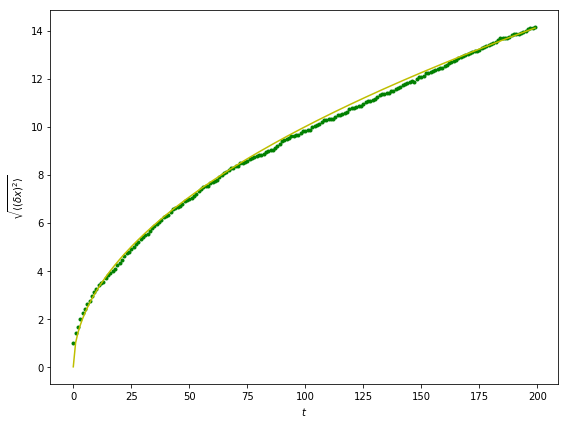

In [60]:
plt.figure(figsize=(8,6)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout() # provide sufficient space for labels

**We find a well-known result in physics: the RMS distance grows as the square root of the time!**

## 1.3.2.3. Broadcasting

* **Basic operations on numpy arrays (addition, etc.) are elementwise**
* **This works on arrays of the same size.**

**Nevertheless, It’s also possible to do operations on arrays of different sizes if NumPy can transform these arrays so that they all have the same size: this conversion is called broadcasting.The image below gives an example of broadcasting:**

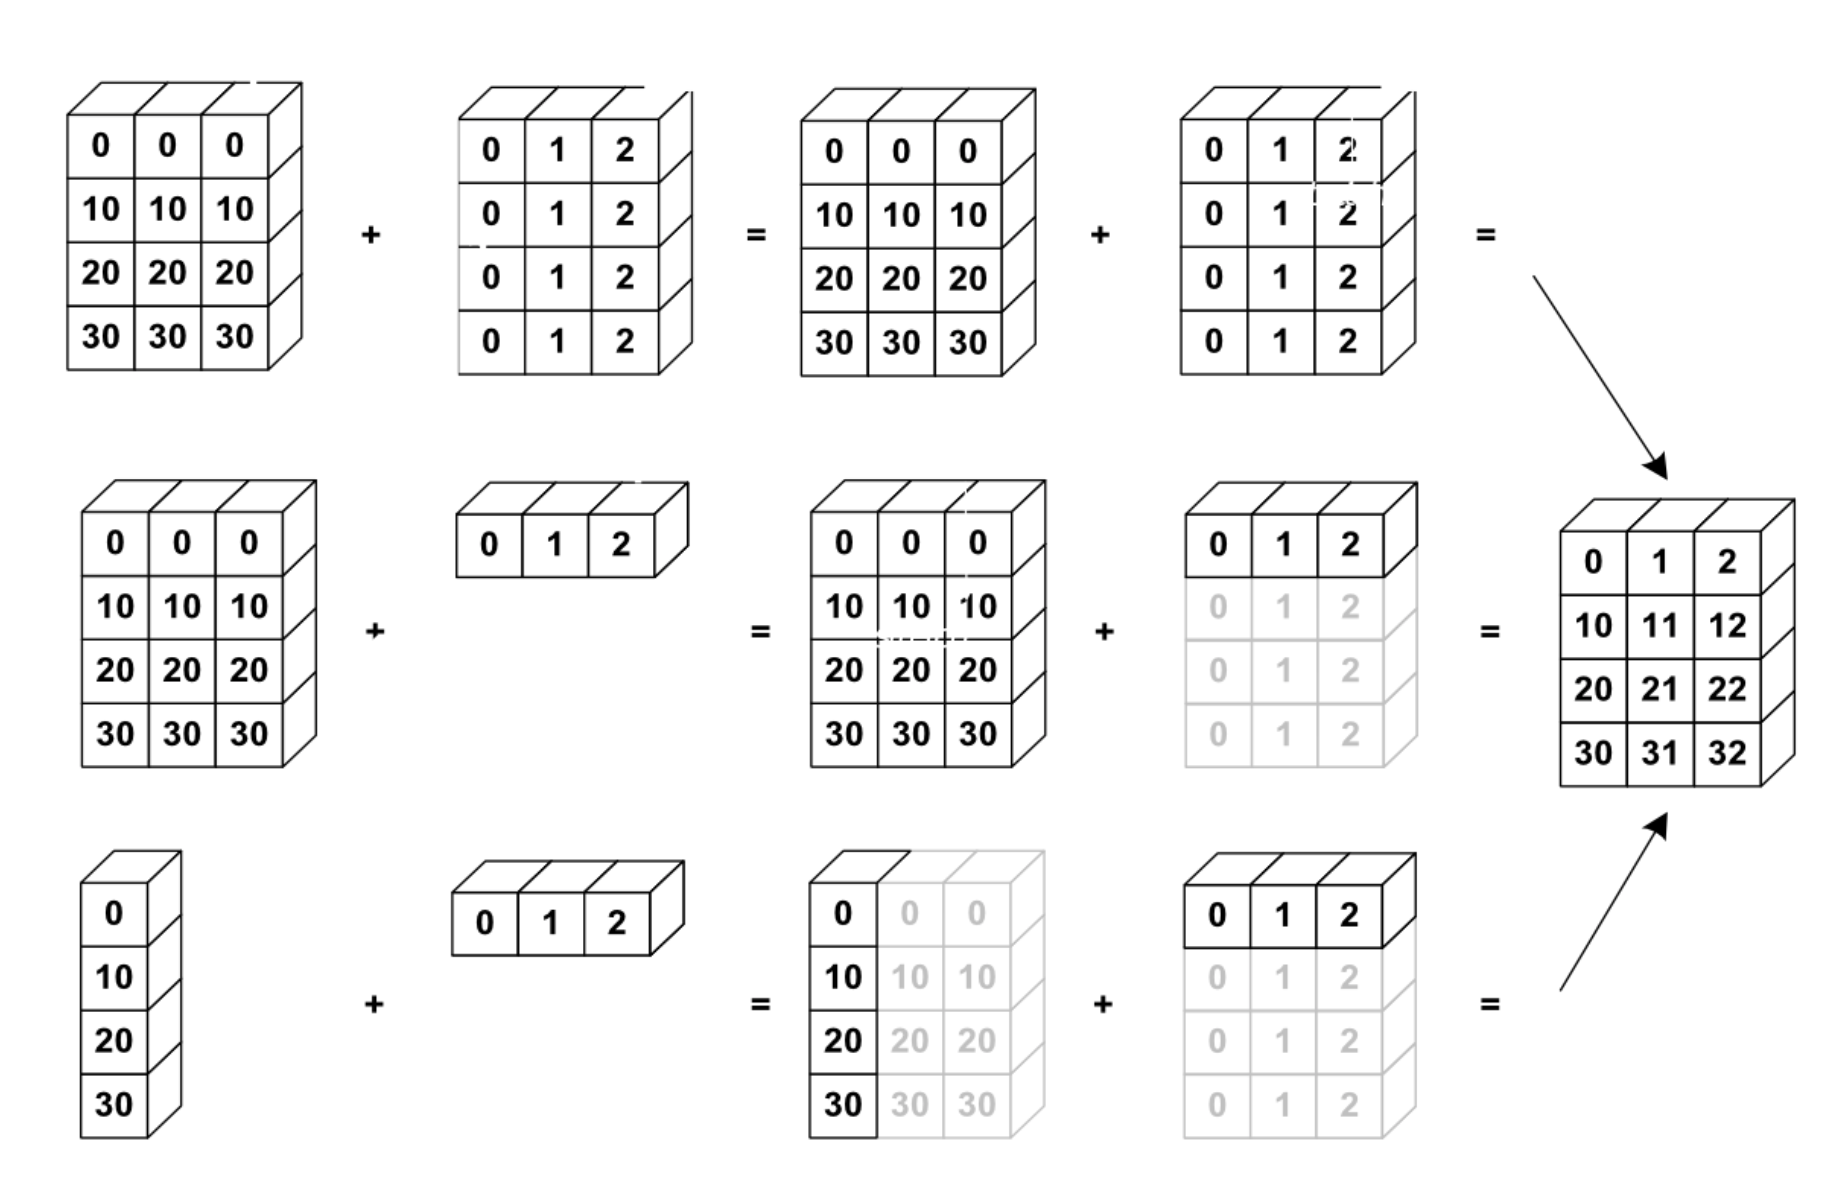

In [61]:
from IPython.display import Image
Image(filename='Images/Broadcasting1.png')

In [62]:
# Let’s verify:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [63]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [64]:
# We have already used broadcasting without knowing it!:
a = np.ones((4, 5))
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [65]:
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [66]:
# An useful trick:
a = np.arange(0, 40, 10)
a.shape
a

array([ 0, 10, 20, 30])

In [67]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1)

In [68]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [69]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

**Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data.**

**Worked Example: Broadcasting
Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.**

In [70]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

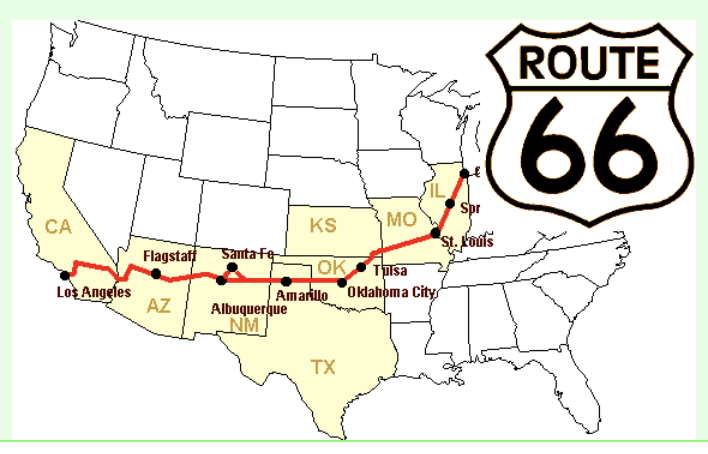

In [71]:
from IPython.display import Image
Image(filename='Images/Broadcasting2.png')

**A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do**

In [72]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

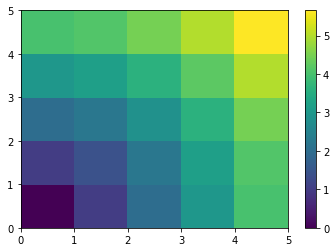

In [73]:
# Or in color:
plt.pcolor(distance)    
plt.colorbar()   

**Remark : the numpy.ogrid() function allows to directly create vectors x and y of the previous example, with two “significant dimensions”:**

In [74]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [75]:
x.shape, y.shape

((5, 1), (1, 5))

In [76]:
distance = np.sqrt(x ** 2 + y ** 2)

**So, np.ogrid is very useful as soon as we have to handle computations on a grid. On the other hand, np.mgrid directly provides matrices full of indices for cases where we can’t (or don’t want to) benefit from broadcasting:**

In [77]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [78]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

**See also [Broadcasting](http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#broadcasting-advanced): discussion of broadcasting in the [Advanced NumPy](http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy) chapter.**

## 1.3.2.4. Array shape manipulation

**Flattening:**

In [79]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [80]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [81]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

**Higher dimensions: last dimensions ravel out “first”.**

**Reshaping:**

In [82]:
# The inverse operation to flattening:
a.shape

(2, 3)

In [83]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

**ndarray.reshape may return a view (cf help(np.reshape))), or copy**

In [84]:
# help(np.reshape)

**Adding a dimension:**

**Indexing with the np.newaxis object allows us to add an axis to an array (you have seen this already above in the broadcasting section):**


In [85]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [86]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [87]:
z[np.newaxis, :]

array([[1, 2, 3]])

**Dimension shuffling:**

In [88]:
a = np.arange(12)
a.reshape(6,2)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [89]:
a = np.arange(12).reshape(6,2)
a

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [90]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [91]:
a[0, 2, 1]

5

In [92]:
b = a.transpose(1, 2, 0)  # Permute the axes according to the values given
b.shape

(3, 2, 4)

In [93]:
b[2, 1, 0]

5

In [94]:
# Also creates a view:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

**Resizing:**

In [95]:
# Size of an array can be changed with ndarray.resize:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

In [96]:
# However, it must not be referred to somewhere else:
# b = a
# a.resize((4,))  

> **Exercise: Shape manipulations**
* **Look at the docstring for reshape, especially the notes section which has some more information about copies and views.**
* **Use flatten as an alternative to ravel. What is the difference? (Hint: check which one returns a view and which a copy)**
* **Experiment with transpose for dimension shuffling.**

## 1.3.2.5. Sorting data

In [97]:
# Sorting along an axis:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

**Note Sorts each row separately!**

In [98]:
# In-place sort:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

In [99]:
# Sorting with fancy indexing:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [100]:
a[j]

array([1, 2, 3, 4])

In [101]:
# Finding minima and maxima:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

> **Exercise: Sorting**
* **Try both in-place and out-of-place sorting.**
* **Try creating arrays with different dtypes and sorting them.**
* **Use all or array_equal to check the results.**
* **Look at np.random.shuffle for a way to create sortable input quicker.**
* **Combine ravel, sort and reshape.**
* **Look at the axis keyword for sort and rewrite the previous exercise.**